<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Author
Alexander Porter

#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as sts
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### **Task 1: Become familiar with the dataset**

After reviewing the dataset variables, I will examine the first 5 rows of the dataframe


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### **Task 2: Generate Descriptive Statistics and Visualizations**

#### Descriptive Statistics:

In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Visualization 1: 
* For the "Median value of owner-occupied homes" provide a **boxplot**

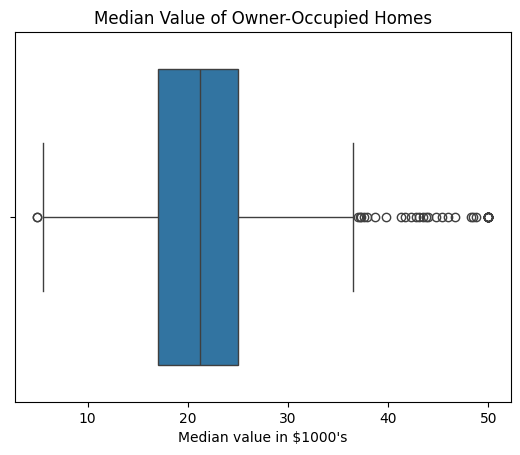

In [5]:
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median value in $1000\'s')
pyplot.show()

#### Explanation 1: 
This boxplot highlights the distribution, central tendency, and variability of the median value of owner-occupied homes. The minimum and maximum can be ascertained from the whiskers, the first and third quartile as well as the IQR from the box, and the median from the line in the box. The individual points outside of the whiskers are the outliers. The median value of owner-occupied homes (in the Boston Housing dataset) is depicted to be approximately $21,000.

#### Visualization 2: 
* Provide a **bar plot** for the Charles river variable 

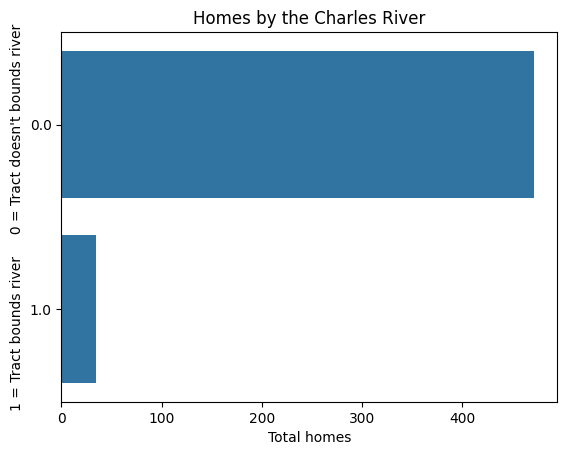

In [6]:
sns.countplot(y=boston_df['CHAS'])
pyplot.title('Homes by the Charles River')
pyplot.xlabel('Total homes')
pyplot.ylabel('1 = Tract bounds river     0 = Tract doesn\'t bounds river')
pyplot.show()

#### Explanation 2: 
This bar plot clearly depicts that there are substantially more homes by the Charles River where the land tracts aren't bounded by the river versus those that are.  

#### Visualization 3: 
* Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older) 

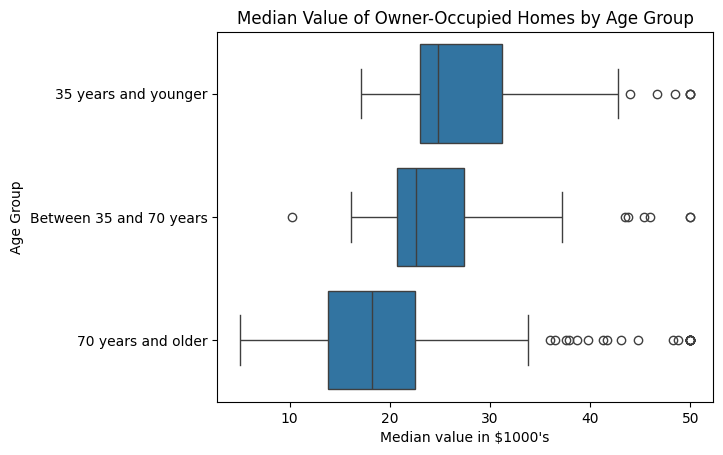

In [7]:
#define a function to categorize age into 3 groups
def discretize_age(AGE):
    if AGE <= 35:
        return '35 years and younger'
    elif 35 < AGE < 70:
        return 'Between 35 and 70 years'
    else:
        return '70 years and older'

# create the AGE_GROUP column and fill values with the above function
boston_df['AGE_GROUP'] = boston_df['AGE'].apply(discretize_age)

sns.boxplot(x='MEDV', y='AGE_GROUP', order=['35 years and younger', 'Between 35 and 70 years', '70 years and older'] , data=boston_df)
pyplot.title('Median Value of Owner-Occupied Homes by Age Group')
pyplot.xlabel('Median value in $1000\'s')
pyplot.ylabel('Age Group')
pyplot.yticks(rotation=0)
pyplot.show()

#### Explanation 3: 
This box plot highlights the same information detailed in explanation 1, where the median value of owner-occupied homes is plotted 3 different ways depending on the corressponding age group of the proportion of owner-occupied units built prior to 1940. There is a clear negative relationship depicted between the median value and the age group; as the median value of owner-occupied homes decreases, the proportion of owner-occupied units built prior to 1940 increases. 

#### Visualization 4: 
* Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship? 

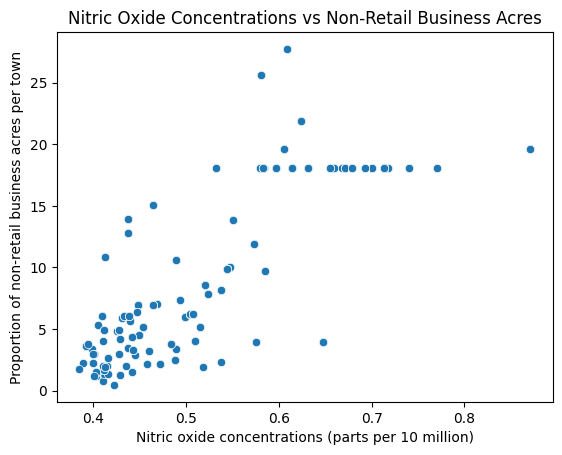

In [8]:
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title('Nitric Oxide Concentrations vs Non-Retail Business Acres')
pyplot.xlabel('Nitric oxide concentrations (parts per 10 million)')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.show()

#### Explanation 4:
This scatter plot depicts the relationship between two variables; the relationship between nitric oxide concentrations and the proportion of non-retail business acres per town appears to be moderately positively correlated as we can generally see the proportion of acres increasing as the concentrations increase.

#### Visualization 5: 
* Create a **histogram** for the pupil to teacher ratio variable 

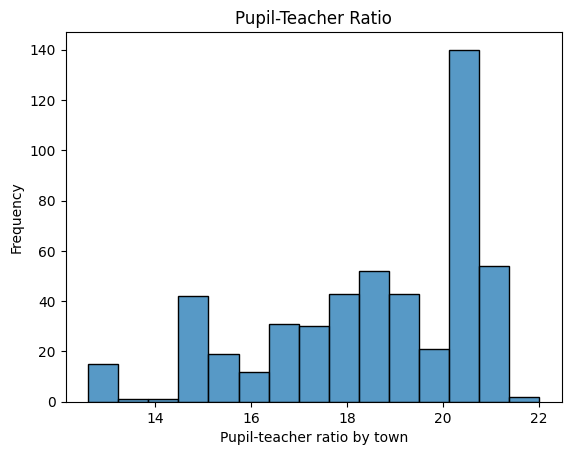

In [9]:
sns.histplot(boston_df['PTRATIO'], bins=15)
pyplot.title('Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-teacher ratio by town')
pyplot.ylabel('Frequency')
pyplot.show()

#### Explanation 5:
This histogram depicts the distribution of the pupil-teacher ratio by town (a variable of the Boston housing data). The range of the ratios is divided into 15 intervals (bins), where the frequency of each bin is measured by the height of the columns. The pupil-teacher ratio is clearly left skewed, which indicates that the mode is greater than the median of this ratio, and the median is likewise greater than the mean.  

#### **Task 3: Use the appropriate tests to answer the questions provided**

#### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) 

#### H<sub>0</sub> (null hypothesis): There is no significant difference in median value of houses bounded by the Charles river
#### H<sub>a</sub> (alternative hypothesis): There is a significant difference in median value of houses bounded by the Charles river
#### α (alpha) = 0.05

In [37]:
alpha = 0.05

# Filter the data based on whether the house is bounded by the Charles River
tract_with_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
tract_without_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform an independent T-test
t_statistic, p_value = sts.ttest_ind(tract_with_river, tract_without_river)

# Print the results and conclusion
print("========================================\n\t\tResults\n========================================")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

print("\n========================================\n\t\tConclusion\n========================================")
if p_value < alpha:
    print(str(p_value) + " is less than " + str(alpha) + ", therefore:")
    print("Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print(str(p_value) + " is greater than or equal to " + str(alpha) + ", therefore:")
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses bounded by the Charles river.")

		Results
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05

		Conclusion
7.390623170519905e-05 is less than 0.05, therefore:
Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles river.


#### Question 2: Is there a difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) 

#### H<sub>0</sub> (null hypothesis): There is no significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#### H<sub>a</sub> (alternative hypothesis): There is a significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#### α (alpha) = 0.05

In [39]:
#Note: The code for Visualization 3 must have been executed above prior to running this test so that 'AGE_GROUP' is defined
alpha = 0.05

# Group the data by AGE_GROUP and get the MEDV values for ANOVA
grouped_data = [group['MEDV'].values for groups, group in boston_df.groupby('AGE_GROUP')]

# Perform ANOVA test
f_stat, p_value = sts.f_oneway(*grouped_data)

# Print the results and conclusion
print("========================================\n\t\tResults\n========================================")
print(f'ANOVA F-statistic: {f_stat}')
print(f'ANOVA p-value: {p_value}')

print("\n========================================\n\t\tConclusion\n========================================")
if p_value < alpha:
    print(str(p_value) + " is less than " + str(alpha) + ", therefore:")
    print("Reject the null hypothesis: There is a significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).")
else:
    print(str(p_value) + " is greater than or equal to " + str(alpha) + ", therefore:")
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).")

		Results
ANOVA F-statistic: 36.40764999196599
ANOVA p-value: 1.7105011022702984e-15

		Conclusion
1.7105011022702984e-15 is less than 0.05, therefore:
Reject the null hypothesis: There is a significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


#### Question 3: Can we conclude that there is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation) 

#### H<sub>0</sub> (null hypothesis): We can conclude that there is no significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town
#### H<sub>a</sub> (alternative hypothesis): We can conclude that there is a significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town
#### α (alpha) = 0.05

In [40]:
alpha = 0.05

# Perform Pearson correlation
correlation_coefficient, p_value = sts.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results and conclusion
print("========================================\n\t\tResults\n========================================")
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

print("\n========================================\n\t\tConclusion\n========================================")
if p_value < alpha:
    print(str(p_value) + " is less than " + str(alpha) + ", therefore:")
    print("Reject the null hypothesis: We can conclude that there is a significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print(str(p_value) + " is greater than or equal to " + str(alpha) + ", therefore:")
    print("Fail to reject the null hypothesis: We can conclude that there is no significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town.")

		Results
Pearson correlation coefficient: 0.763651446920915
p-value: 7.913361061241532e-98

		Conclusion
7.913361061241532e-98 is less than 0.05, therefore:
Reject the null hypothesis: We can conclude that there is a significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town.


#### Question 4: What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes? (Regression analysis) 

#### H<sub>0</sub> (null hypothesis): There is no significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes
#### H<sub>a</sub> (alternative hypothesis): There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes
#### α (alpha) = 0.05

In [41]:
alpha = 0.05
MEDV_multiple = 1000 #MEDV is priced in $1000's

# independent variable DIS with a constant added (for intercept)
x = boston_df['DIS']
x = sm.add_constant(x)

# dependent variable MEDV
y = boston_df['MEDV']

# Perform regression
model = sm.OLS(y, x).fit()

# Extract the coefficient and p-value for 'DIS'
coef = model.params['DIS']
p_value = model.pvalues['DIS']

# Print the coefficient and p-value for 'DIS'
print("========================================\n\t\tResults\n========================================")
print(f"weighted distance to five Boston employment centers ('DIS') coefficient : {coef}")
print(f"weighted distance to five Boston employment centers ('DIS') p-value: {p_value}\n")

# Print the results and conclusion
print("\n========================================\n\t\tConclusion\n========================================")
print("For a one unit increase in weighted distance to five Boston employment centers, the median value of owner occupied homes increases by $" + str(f"{coef*MEDV_multiple:,.2f}") + '.\n')
if p_value < alpha:
    print(str(p_value) + " is less than " + str(alpha) + ", therefore:")
    print("Reject the null hypothesis: There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.")
else:
    print(str(p_value) + " is greater than or equal to " + str(alpha) + ", therefore:")
    print("Fail to reject the null hypothesis: There is no significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.")

              


		Results
weighted distance to five Boston employment centers ('DIS') coefficient : 1.0916130158411075
weighted distance to five Boston employment centers ('DIS') p-value: 1.2066117273371793e-08


		Conclusion
For a one unit increase in weighted distance to five Boston employment centers, the median value of owner occupied homes increases by $1,091.61.

1.2066117273371793e-08 is less than 0.05, therefore:
Reject the null hypothesis: There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.
